# Cheat Sheet 4

## Exercise 1
In this exercise, you are tasked with implementing a 2-dimensional gradient descent algorithm where the loss function is not explicitly known Our loss function is a black box to us-- we are allowed to hand it some inputs as parameters to an API call, and it sends us back an output, but we are not privy to its internal mechanisms, so we cannot explictly take its gradient.

/// change conversation to be more socratic

Let us briefly review gradient descent on a conceptual level. Here is the gist of a 2-d gradient descent algorithm,
1. Specify an initial set of input parameters: 
    - e.g. $(a,b) = (0.5, 0.5)$
2. Caclulate the gradient (i.e. direction of steepest ascent) of the loss function at those input parameters
    - Find the value of $\nabla f(a,b)$
3. Move (a,b) a small step in the opposite direction of the gradient, since this is the direction of steepest descent
    - Replace $(a,b)$ with $(a,b) - \varepsilon \nabla f(a,b)$ for some small positive scalar $\varepsilon$
4. Rinse and repeat steps 2 & 3 until $f(a,b)$ converges.

![Gradient Descent](Gradient_descent.png)
[image source](https://en.wikipedia.org/wiki/Gradient_descent#/media/File:Gradient_descent.svg)

The only added difficulty we face is in step 2. We need to somehow approximate the gradient based on function values alone. A bit of math should be able to help us in this endeavor. Recall the following formula for the gradient:

$\displaystyle \nabla f(a,b) = \frac{\partial f}{\partial x} (a,b) \hat i + \frac{\partial f}{\partial y} (a,b) \hat j$, where $\hat i$ and $\hat j$ are the unit vectors in the positive $x$ and $y$ directions respectively. 

This formula tells us that the partial derivatives $\displaystyle \frac{\partial f}{\partial x} (a,b)$ and $\displaystyle \frac{\partial f}{\partial x} (a,b)$ in the x and y directions uniquely determine the direction of steepest ascent. These partial derivatives can be computed as follows:

$\displaystyle \frac{\partial f}{\partial x} (a,b) := \lim_{h\to 0} \frac{f(a+h,b) - f(a,b)}{h}$

$\displaystyle \frac{\partial f}{\partial y} (a,b) := \lim_{h\to 0} \frac{f(a,b+h) - f(a,b)}{h}$

Let us focus on the first definition, as the second one follows essentially the same logic.

The numerator of the fraction inside the limit, $\displaystyle f(a+h,b) - f(a,b)$, tells us how much the function $f$ increases or decreases when our input makes small step of size $h$ to the right (in the positive $x$ direction) from our input $(a,b)$. In other words, this is the **rise** as we take a step to the right.

The denominator of that same fraction $h$ is simply the size of the step our input has taken. In other words, this is the **run** of that step to the right. 

As we all learned in basic algebra, slope = rise/run. So the fraction inside the limit is the slope of that small step. As $h\to 0$, our step gets smaller and smaller, so the fraction becomes a better and better approximation of the slope in the $x$ direction at the point $(a,b)$. 

Thus, if we take a suffiently small value of $h$, we get the following approximation:

$\displaystyle \frac{\partial f}{\partial x} (a,b) \approx \frac{f(a+h,b) - f(a,b)}{h}$

By the same reasoning, for a sufficiently small value of $h$, we also get an approximation for the partial derivative in the $y$ direction 

$\displaystyle \frac{\partial f}{\partial y} (a,b) \approx \frac{f(a,b+h) - f(a,b)}{h}$.

Notice that both of these approximations only require us to know a few function values, which we can easily query from the API. Thus we can at last get an approximation of the gradient:

$\displaystyle \nabla f(a,b) \approx \frac{f(a+h,b) - f(a,b)}{h} \hat i + \frac{f(a,b+h) - f(a,b)}{h} \hat j$, for a small value of $h$.

## Exercise 2

In this exercise, we are tasked with modifying Professor McDougal's implementation of the k-means clustering algorithm to work on geographical data (coordinates on a sphere, rather than a plane). Let's start by reviewing his original code to make sense of what's happening at each step.

First, the we import the external tools that we need:

In [1]:
import pandas as pd
import plotnine as p9
import random
import numpy as np

Then we get some data to run our algorithm on and load it into a dataframe:

In [2]:
df = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/iris.csv')

The k-means algorithm works much better if the data is not stretched out in any particular direction, so we write a normalizing function:

In [3]:
def normalize(series):
    return (series - series.mean()) / series.std()

This function moves the series so that it is centered at 0, then scales each value in the series so that its standard deviation is 1.
Using this function, we normalize two series from our dataframe:

In [4]:
df['petal.length.normalized'] = normalize(df['petal.length'])
df['petal.width.normalized'] = normalize(df['petal.width'])

Since we have normalized both of these series, we have effectively centered our dataset at the origin, then squished/stretched it so that it has unit standard deviation both horizontally and vertically.

Our final step in preparation is to specify the inputs and parameters of our algorithm:

In [34]:
k = 3
pts = [np.array(pt) for pt in zip(df['petal.length.normalized'], df['petal.width.normalized'])]

Here, the parameter `k=3` is the number of clusters we have (arbitrarily) chosen to categorize our data into, and the input `pts` is a list of numpy arrays encoding the coordinates for each point.

Now our algorithm begins in earnest. We start by initializing our clusters to have random centers and to contain no points:

In [35]:
centers = random.sample(pts, k)
old_cluster_ids, cluster_ids = None, [] # arbitrary but different

In each run through the following loop, we will iteratively update these clusters by changing the location of their centers. The points will then be reclassified to whichever cluster has the closest center. The algorithm terminates when all the points fail to move between clusters in a single run through the loop:

(2,)
1
(2,)
1
(2,)
1
(2,)
1
(2,)
1
(2,)
1
(2,)
1
(2,)
1
(2,)
1
(2,)
1


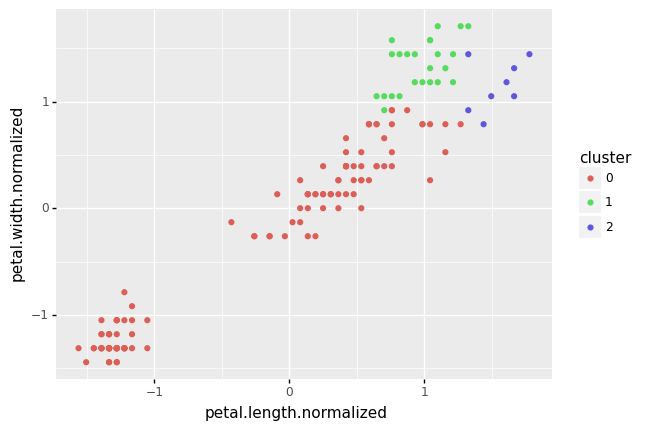

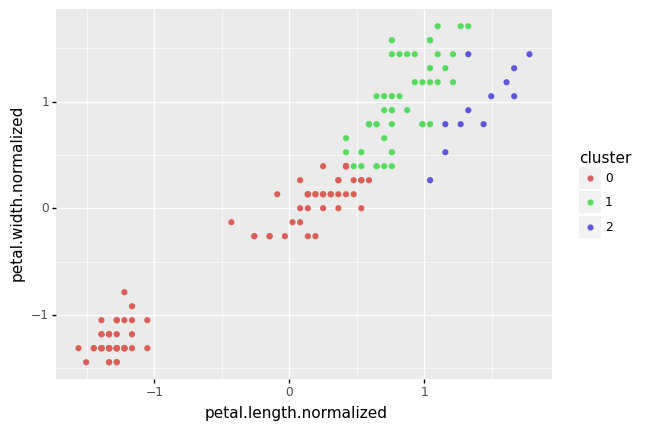

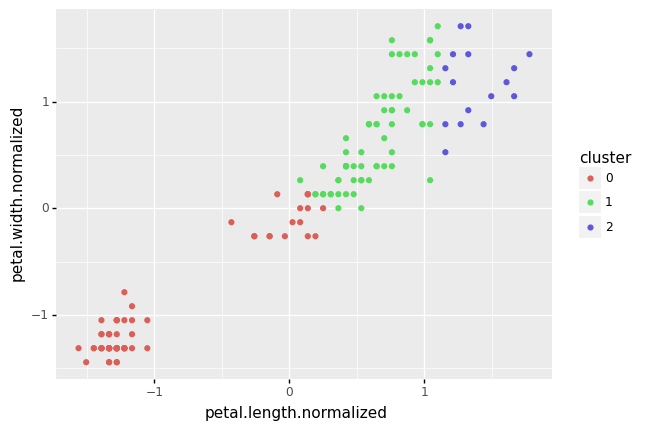

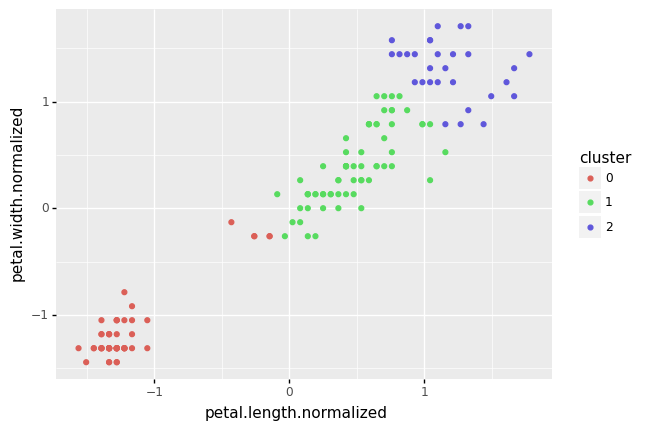

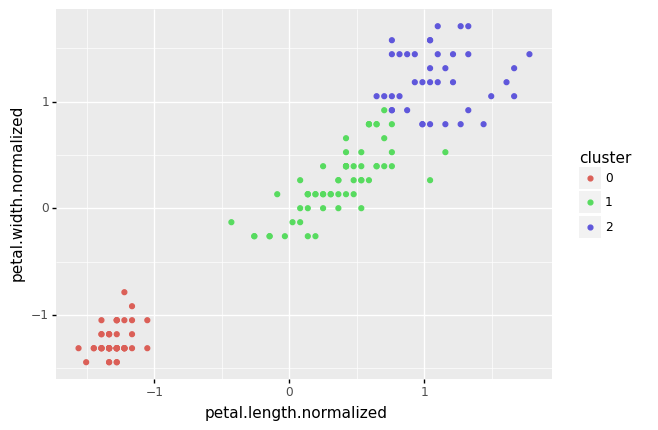

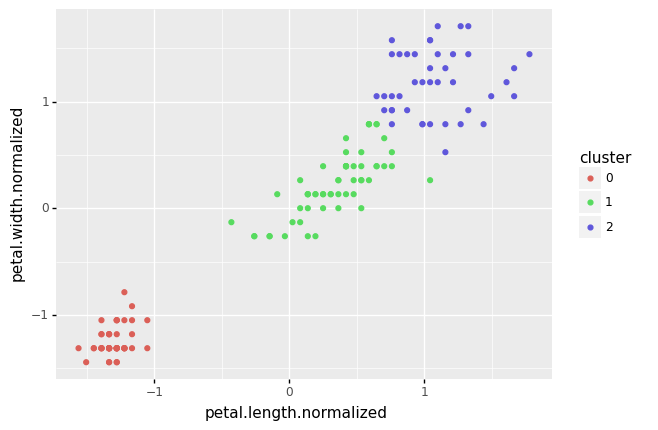

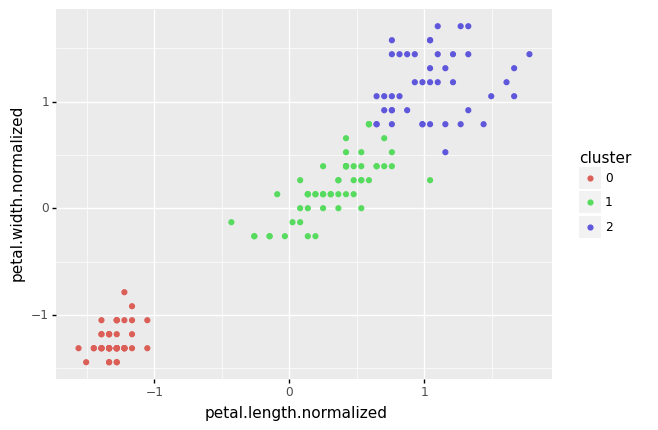

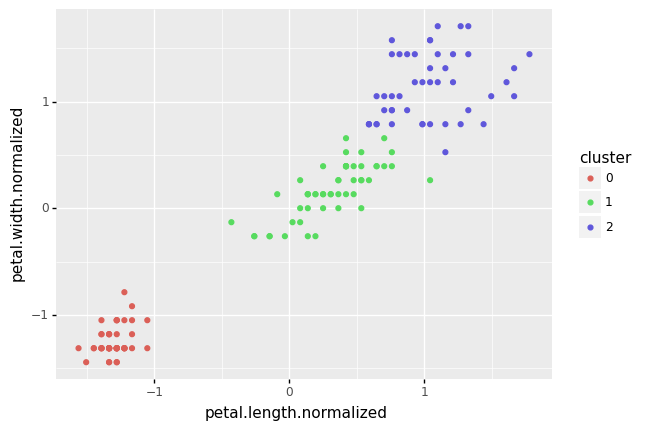

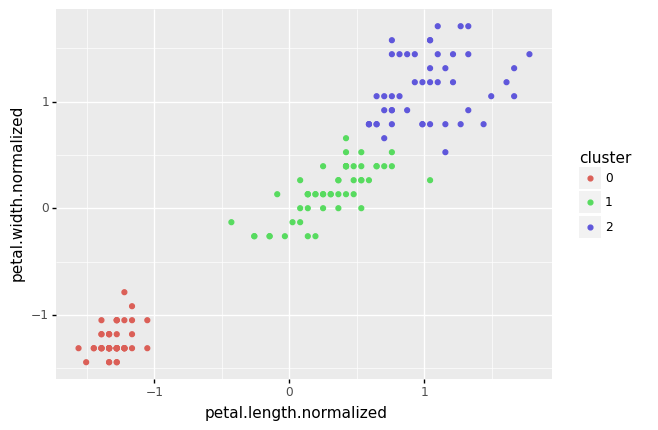

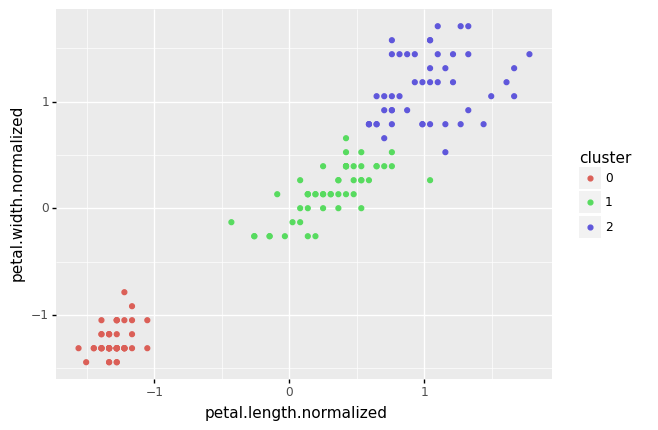

In [36]:
while cluster_ids != old_cluster_ids: #### change to do while?
    old_cluster_ids = list(cluster_ids)
    cluster_ids = []
    for pt in pts:
        min_cluster = -1
        min_dist = float('inf')
        for i, center in enumerate(centers):
            dist = np.linalg.norm(pt - center)
            if dist < min_dist:
                min_cluster = i
                min_dist = dist
        cluster_ids.append(min_cluster)
    df['cluster'] = cluster_ids
    df['cluster'] = df['cluster'].astype('category')
    cluster_pts = [[pt for pt, cluster in zip(pts, cluster_ids) if cluster == match]
                    for match in range(k)]
    centers = [sum(pts)/len(pts) for pts in cluster_pts]
    print(centers[0].shape)
    print(centers[0].ndim)
    (p9.ggplot(df, p9.aes(x="petal.length.normalized", y="petal.width.normalized", color="cluster")) + p9.geom_point()).draw()

Pay special attention to the following block of code:

```python
for i, center in enumerate(centers):
    dist = np.linalg.norm(pt - center)
    if dist < min_dist:
        min_cluster = i
        min_dist = dist
    cluster_ids.append(min_cluster)
```

In the second line, we are using the euclidian norm of $pt - center$ to determine the distance between that point and that cluster's center. It is precisely this distance function that determines which cluster's center is closest, and therefore which cluster the point will end up in the next run through the loop. This works perfectly well when our points are in euclidian space, as is the case with the above dataset. If, however, our points are in some other type of space, we need to use a different metric to determine the distance between a given point and a given cluster center. In this exercise your data lives on a sphere, so you should use the haversine metric. You can find an implementation of the haversine metric in the accepted answer to this [stack overflow question](https://stackoverflow.com/questions/4913349/haversine-formula-in-python-bearing-and-distance-between-two-gps-points).

Also pay attention to the following line of code from the algorithm:

```python
centers = [sum(pts)/len(pts) for pts in cluster_pts]
```

This line of code updates the locations "center" of each cluster to be at the center of mass (or more formally, the centroid) of all that cluster's points. Again, this is applicable in euclidian space, but fails to apply for other types of spaces. To illustrate this, suppose we have 2 points, A & B, on the equator of the earth: one at longitude $160^{\circ}$, and one at longitude $-160^{\circ}$. We would intuitively expect that the "center" between these points will be the midpoint on the shortest between A & B arc $\widehat{AB}$, but the euclidean centroid will give us the point D at $(lat,long)=(0,0)$, on the opposite side of the planet from our intuition.

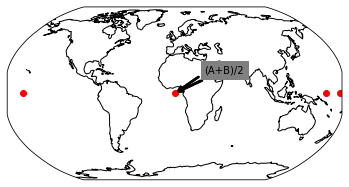

<Figure size 432x288 with 0 Axes>

In [70]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
A = ['A', 0, -160]
B = ['B', 0, 160]
C = ['Center', 0, 175] #should be [0, 180], but plot cuts off at edges
D = ['(A+B)/2', 0, 0]

pt_data = [A, B, C, D]
lats = [pt[1] for pt in pt_data]
lngs = [pt[2] for pt in pt_data]



for name, lng, lat in pt_data:
    plt.plot(lng, lat, marker='o', markersize=7.0, markeredgewidth=2.5,
                 markerfacecolor='red', markeredgecolor='white',
                 transform=ccrs.Robinson())
    at_x, at_y = ax.projection.transform_point(lng, lat, src_crs=ccrs.Robinson())
    plt.annotate(
        name, xy=(at_x, at_y), xytext=(30, 20), textcoords='offset points',
        color='black', backgroundcolor='grey', size='medium',
        arrowprops=dict(arrowstyle='->', color='black', linewidth=2.5))
    at_x, at_y = ax.projection.transform_point(lng, lat, src_crs=ccrs.PlateCarree())
    #ax.annotate(name, xy=(at_x, at_y), transform=ccrs.PlateCarree())
ax.coastlines()
ax.plot(lngs, lats, marker="o", color="red", transform=ccrs.PlateCarree(), linestyle='None')

ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())

plt.show()
plt.savefig('euclidean_avg_sphere', format='png')
#fix centroid https://stackoverflow.com/questions/37885798/how-to-calculate-the-midpoint-of-several-geolocations-in-python

How are we to fix this problem? Here's one solution:
1. Embed our points into a unit sphere in 3-dimensional euclidean space using a coordinate transformation, $\displaystyle v = (x,y,z) = T(lat,long)$.
    - $\displaystyle\hat v_i = (x_i, y_i, z_i) = T(lat_i, long_i)$
2. Treat each embedded data point as a vector, pointing from the origin $(0,0,0)$ to that embedded point.
3. Add up all of these vectors using element-wise addition to get some total sum vector, $S$
    - $\displaystyle S = \hat v_1 + \hat v_2 + \ldots + \hat v_n$
    - where the sum of $\displaystyle v = (x, y, z)$ and $\displaystyle u = (a, b, c)$ is given by $\displaystyle v + u = (x+a, y+b, z + c)$
4. Normalize this sum vector by dividing by its euclidean length to get a vector $\displaystyle \hat S$ that lies on the unit sphere:
    - $\displaystyle \hat S = \frac{S}{|S|}$


5. Use the inverse $T^{-1}$ of the coordinate transformation from step 1 to take our normalized vector $\hat S$ back to our original coordinate system:
    - $\displaystyle (lat_{center}, long_{center}) = T^{-1}(\hat S)$ 

|![Step 3 & 4 gets the center of these embedded points on our sphere in 3d space](./vector_avg.png)| 
|:--:|
|Step 3 & 4 together compute the center of these embedded points on our sphere in 3d space, as seen in this image. [image source](https://www.ffi.no/en/research/n-vector/#example_7)   |

The result of this final step gives us the values for the center coordinates in lattitude and longitude, which we can set as the new coordinates for the new center of a cluster in the k-means algorithm. Here's an implementation of this solution in python:

In [38]:
import numpy as np
import numpy.linalg as lin
from math import sin, cos, sqrt, atan2, acos, radians, degrees, pi

In [45]:
#takes 2-d coords as numpy array, returns numpy array representing vector
def T(geocoords):
    #unpack coords from input
    long, lat = geocoords
    
    #convert long and lat to spherical coords
    theta = radians(long)
    phi = pi/2 - radians(lat)
    
    #convert spherical coords to 3-d cartesian coords
    x = sin(phi)*cos(theta)
    y = sin(phi)*sin(theta)
    z = cos(phi)
    
    return np.array([x,y,z])

In [46]:
T(np.array([0,-90]))

array([ 1.2246468e-16,  0.0000000e+00, -1.0000000e+00])

In [51]:
# takes numpy array representing 3-d unit vector, returns numpy array representing long and lat coords
def inverseT(vec):
    #unpack coords of input
    x, y, z = vec
    
    theta = atan2(x,y)
    phi = acos(z/sqrt(x * x + y * y + z * z))
    
    long = degrees(theta)
    lat = degrees(pi/2 - phi)
    
    return np.array([long, lat])

In [57]:
inverseT(np.array([sqrt(2)/2, sqrt(2)/2, 0]))

array([45.,  0.])

In [59]:
# takes a 3 x n numpy array representing a list of our 3d vectors, 
# returns their normalized sum
def centroid(vecs):
    summed = np.sum(vecs, axis=0)
    normalized = summed / lin.norm(summed)
    return normalized

In [64]:
vecs = np.array([[0, 0, 1], [1, 0, 0]])
centroid(vecs)*sqrt(2)

array([1., 0., 1.])

In [9]:
#install cartopy in terminal
!conda install -c conda-forge cartopy -y

Solving environment: \ 
  - anaconda/linux-64::certifi-2021.10.8-py39h06a4308_0
  - defaults/linux-64::certifi-2021.10.8-py39h06a4308done

# All requested packages already installed.



In [10]:
from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
    return c * r

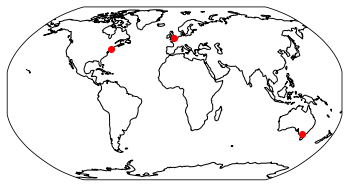

In [11]:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
yale = [41.3083, -72.9279]
oxford = [51.7520, -1.2577]
melbourne = [-37.8136, 144.9631]
lats = [school[0] for school in [yale, oxford, melbourne]]
lngs = [school[1] for school in [yale, oxford, melbourne]]
ax.coastlines()
ax.plot(lngs, lats, "o", color="red", transform=ccrs.PlateCarree())
ax.set_extent([-180, 180, -90, 90], crs=ccrs.PlateCarree())
plt.show()

## Exercise 3

This exercise is relatively straightforward. 
// how to function decorators? 
// numba function decorator? 

## Exercise 4

// do a dummy dynamic programming problem
// pain point = backtracking, lots of hand holding